In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
from sklearn.preprocessing import LabelEncoder

le =  LabelEncoder()
for i in df:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])
    else:
        continue

In [6]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


gnb = AdaBoostClassifier()

In [9]:
gnb.fit(X_train, y_train)

f:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [10]:
y_pred = gnb.predict(X_test)

In [11]:
print(y_pred[:25])

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0]


In [12]:
a = accuracy_score(y_pred, y_test)

In [13]:
print(a)

0.7604166666666666


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       119
           1       0.70      0.64      0.67        73

    accuracy                           0.76       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192

F1 Score:  0.6714285714285714
[[99 20]
 [26 47]]


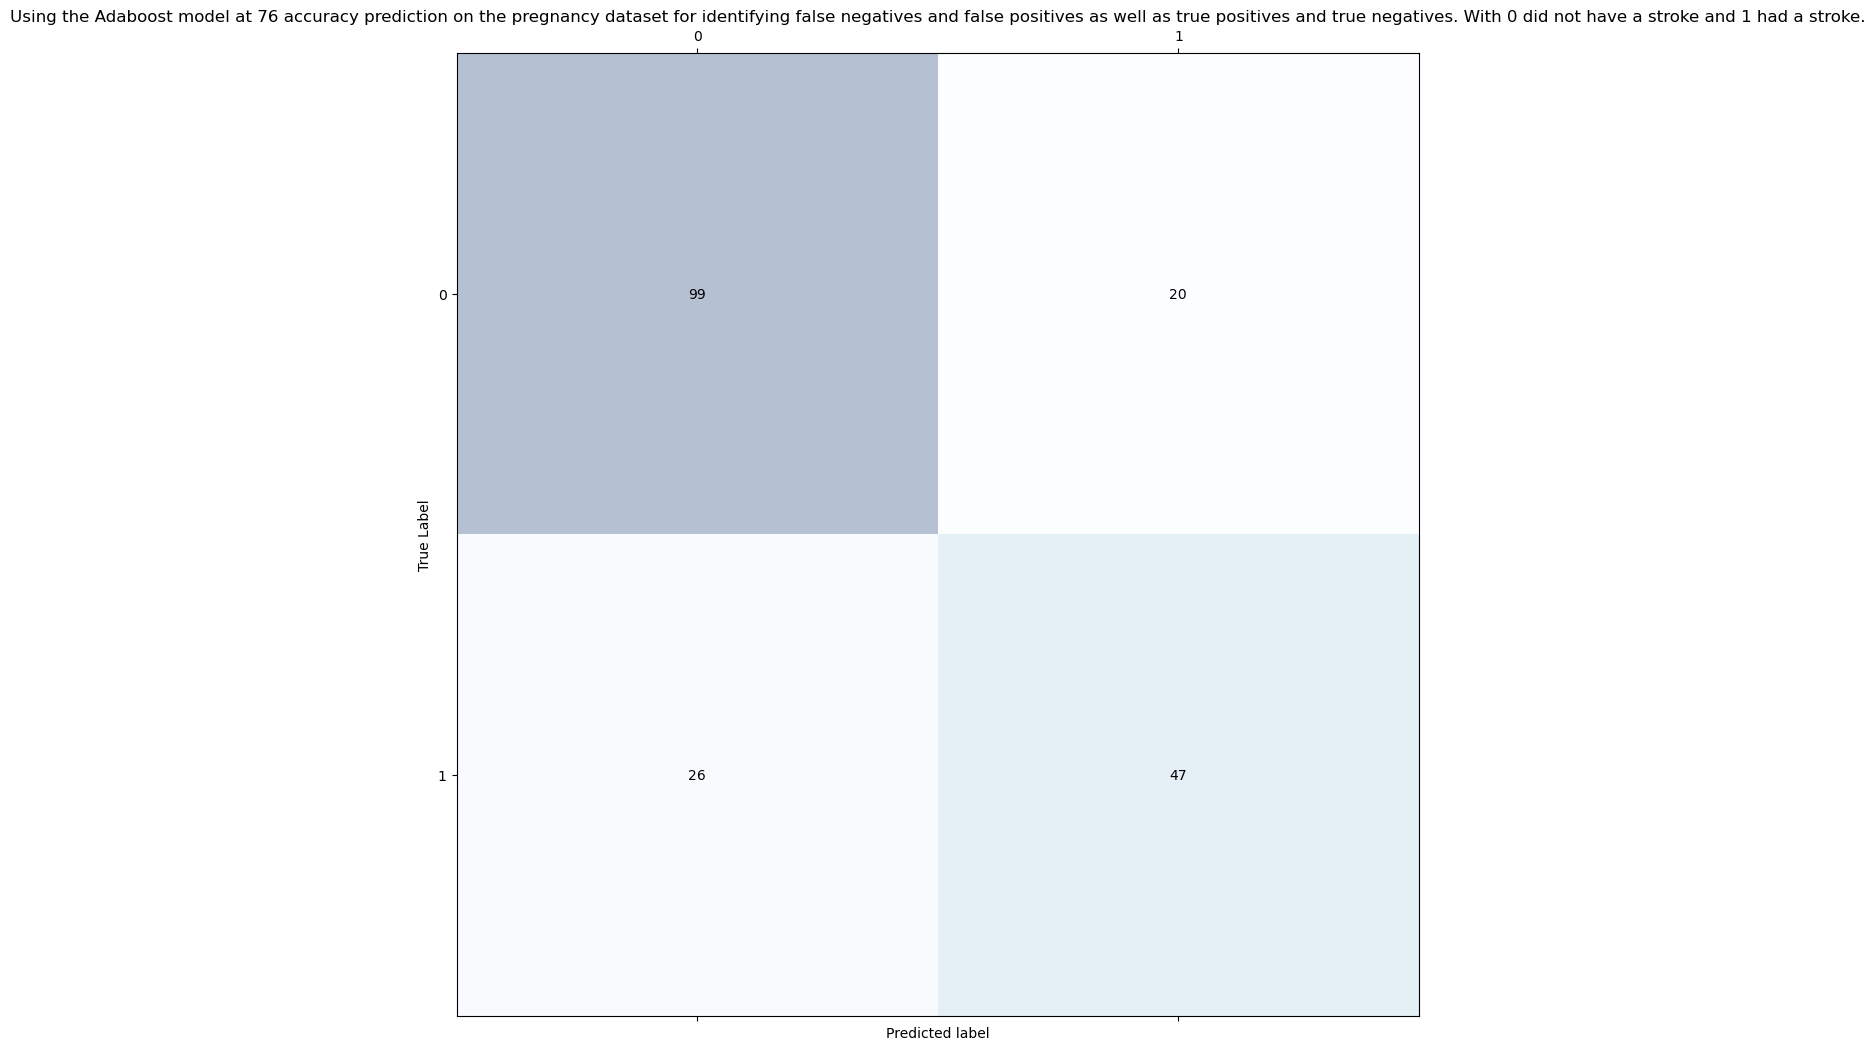

In [14]:
print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(confmat)

fig, ax =plt.subplots(figsize=(12.5, 12.5))
ax.matshow(confmat,  cmap=plt.cm.Blues, alpha=0.30)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
    plt.title('Using the Adaboost model at 76 accuracy prediction on the pregnancy dataset for identifying false negatives and false positives as well as true positives and true negatives. With 0 did not have a stroke and 1 had a stroke.')
    plt.xlabel('Predicted label')
    plt.ylabel('True Label')

In [15]:
import pickle
with open('model_pkl.pkl', 'wb') as files:
    pickle.dump(gnb, files)